In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/shahnawazaadil/Downloads/Restaurant-main/Dataset .csv')

In [3]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [4]:
#unnecessary columns
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Country Code', 
                   'Address', 'Locality', 'Locality Verbose', 'Longitude', 
                   'Latitude', 'Currency', 'Switch to order menu', 
                   'Rating color', 'Rating text', 'Votes','Has Table booking','Has Online delivery','Is delivering now']

df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df

,City,Cuisines,Average Cost for two,Price range,Aggregate rating
0,Makati City,"French, Japanese, Desserts",1100,3,4.8
1,Makati City,Japanese,1200,3,4.5
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,4,4.4
3,Mandaluyong City,"Japanese, Sushi",1500,4,4.9
4,Mandaluyong City,"Japanese, Korean",1500,4,4.8
...,...,...,...,...,...
9546,��stanbul,Turkish,80,3,4.1
9547,��stanbul,"World Cuisine, Patisserie, Cafe",105,3,4.2
9548,��stanbul,"Italian, World Cuisine",170,4,3.7
9549,��stanbul,Restaurant Cafe,120,4,4.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

df.dropna(subset=['Cuisines'], inplace=True)

features = ['Average Cost for two', 'Price range', 'Aggregate rating']

In [7]:
X = df[features]

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Cuisines'].str.split(', '))  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,Average Cost for two,Price range,Aggregate rating
8177,450,1,2.8
6401,700,2,3.2
81,120,4,4.1
1332,300,1,0.0
9041,500,2,3.4
...,...,...,...
5743,250,1,0.0
5200,300,1,4.0
5399,500,2,3.0
869,100,1,2.8


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [10]:
df = df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Cuisines']]

df.dropna(subset=['Cuisines'], inplace=True)

df['Cuisines'] = df['Cuisines'].apply(lambda x: [] if pd.isna(x) else x.split(', '))

/var/folders/qs/t8k57xxs507c3gjqc0gnk8q40000gn/T/ipykernel_20656/400823738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Cuisines'], inplace=True)
/var/folders/qs/t8k57xxs507c3gjqc0gnk8q40000gn/T/ipykernel_20656/400823738.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisines'] = df['Cuisines'].apply(lambda x: [] if pd.isna(x) else x.split(', '))


In [11]:
mlb = MultiLabelBinarizer()
y_binary = mlb.fit_transform(df['Cuisines'])

X = df.drop(columns=['Cuisines'])
y = y_binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_classifier = MultiOutputClassifier(base_classifier)

multi_target_classifier.fit(X_train, y_train)

y_pred = multi_target_classifier.predict(X_test)

In [13]:
hamming_loss_value = hamming_loss(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro') 

print("Hamming Loss:", hamming_loss_value)
print("Accuracy:", accuracy)
print("F1 Score (Micro-average):", f1)

Hamming Loss: 0.015173136323404562
Accuracy: 0.047668936616029334
F1 Score (Micro-average): 0.2385786802030457


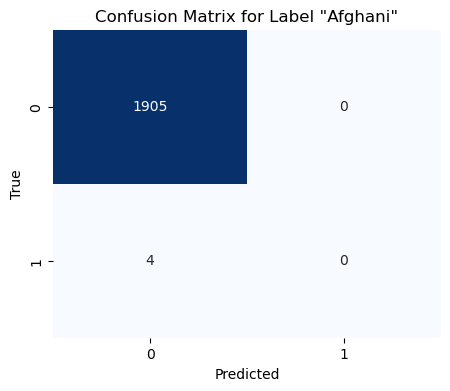

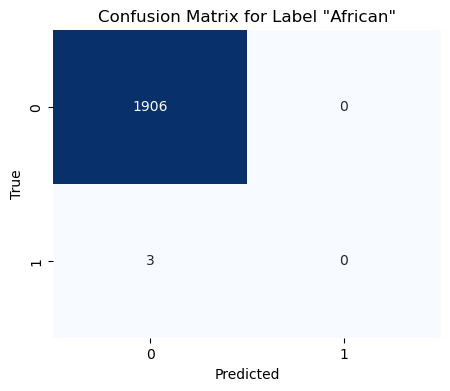

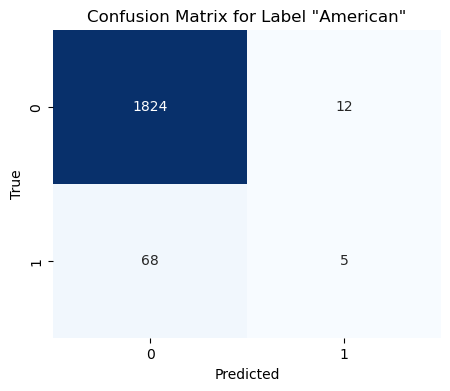

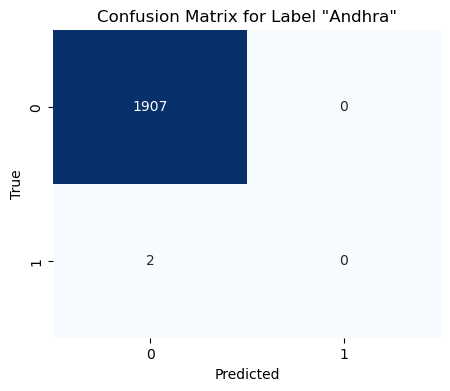

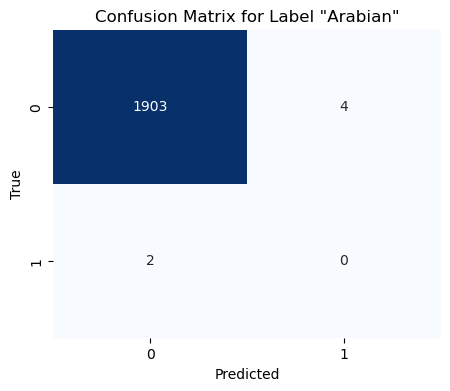

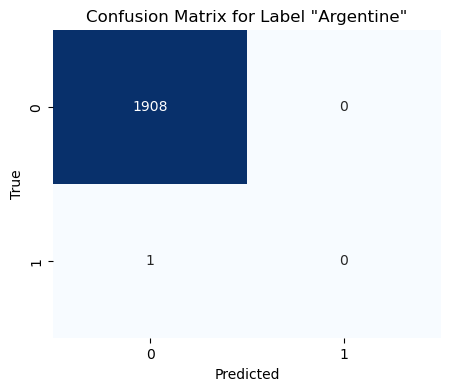

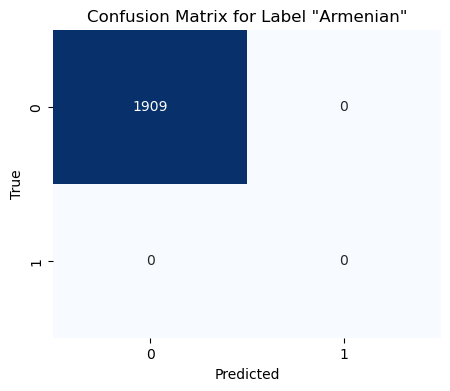

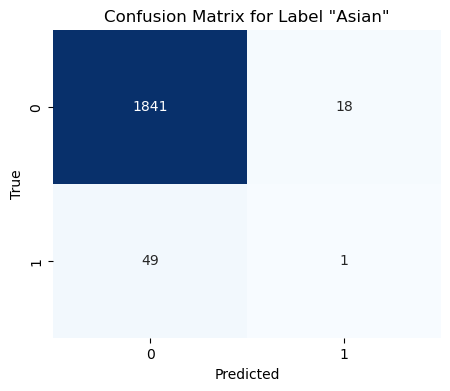

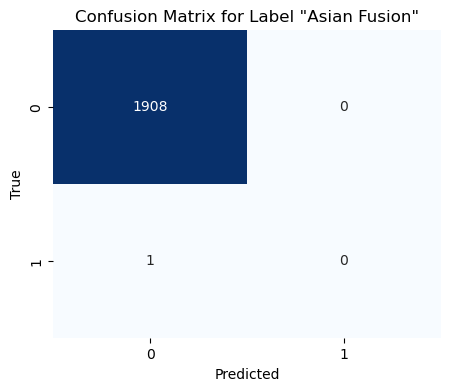

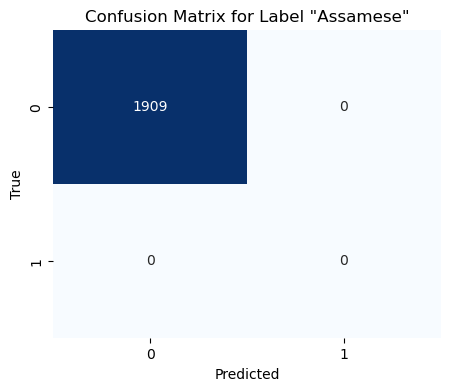

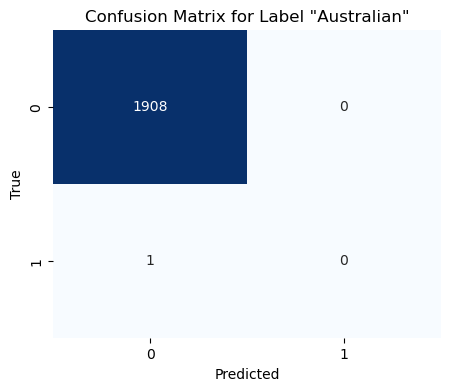

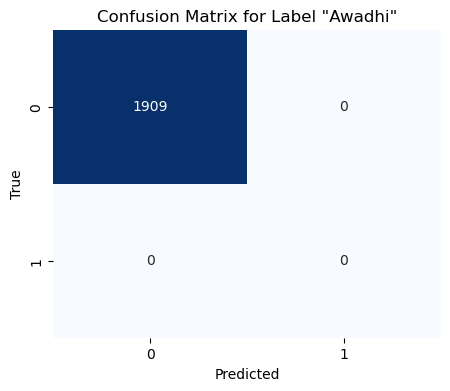

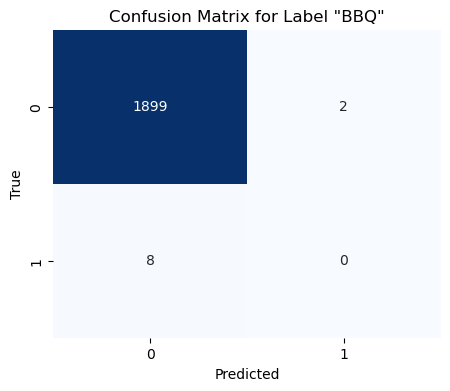

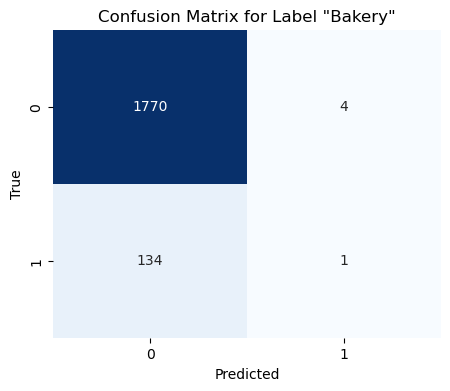

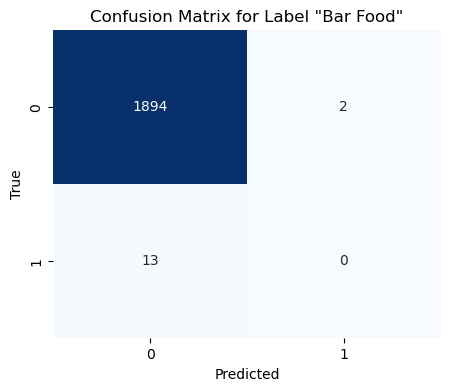

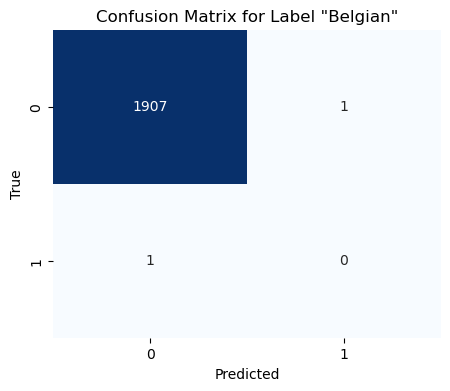

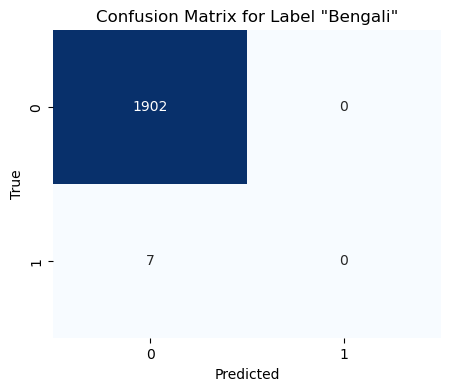

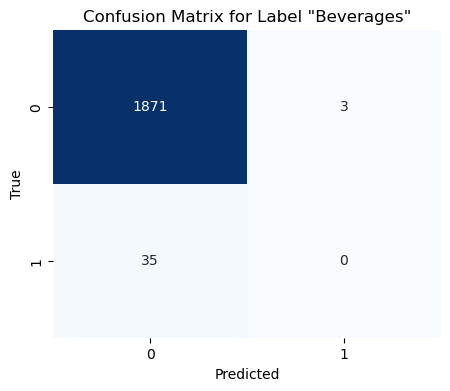

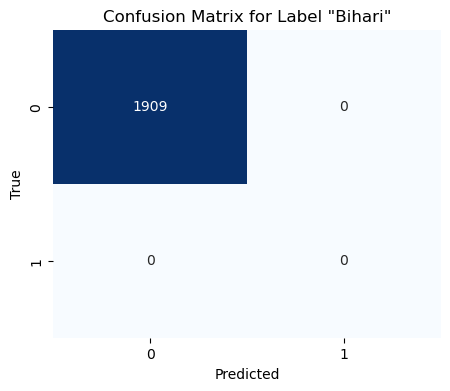

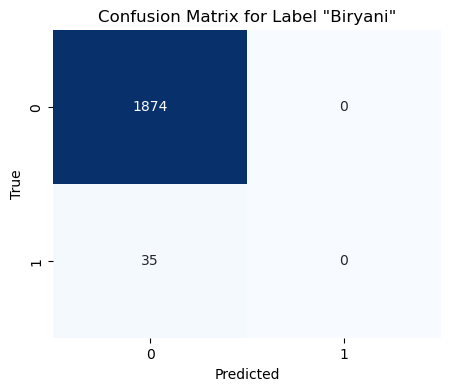

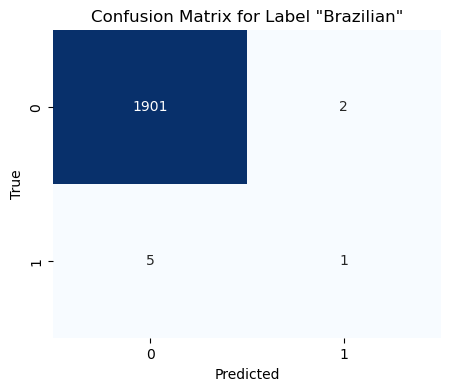

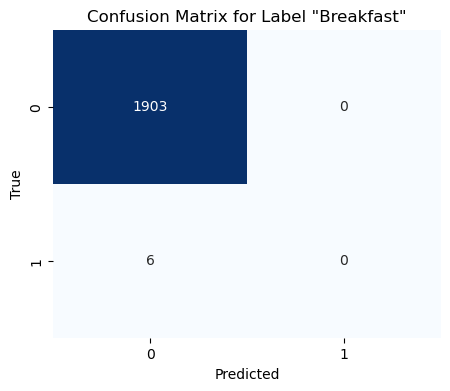

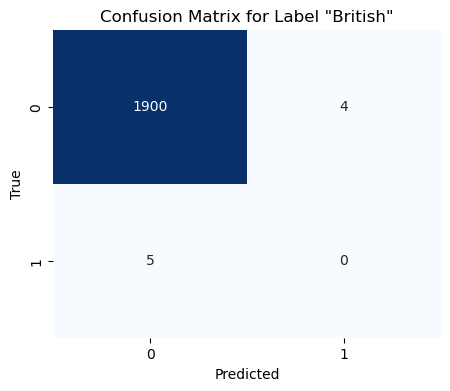

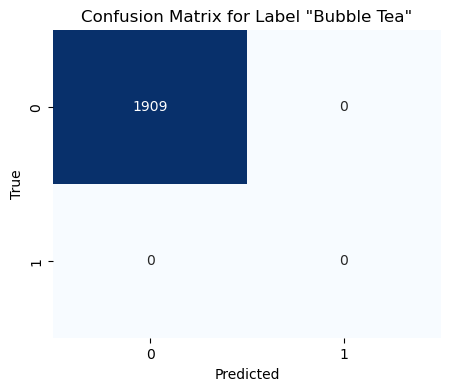

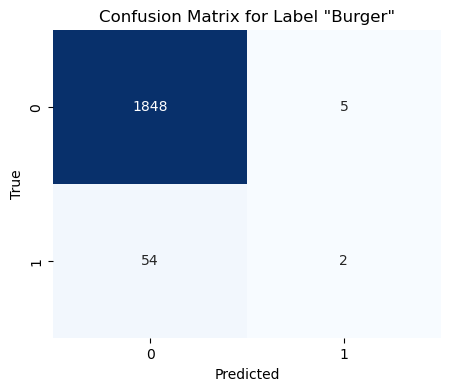

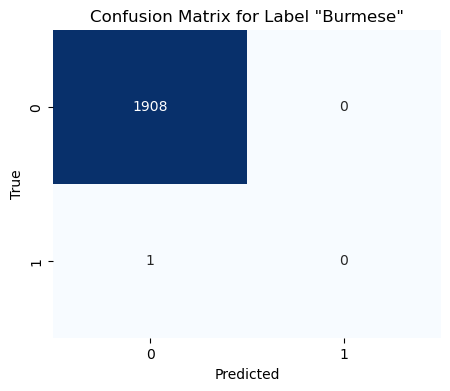

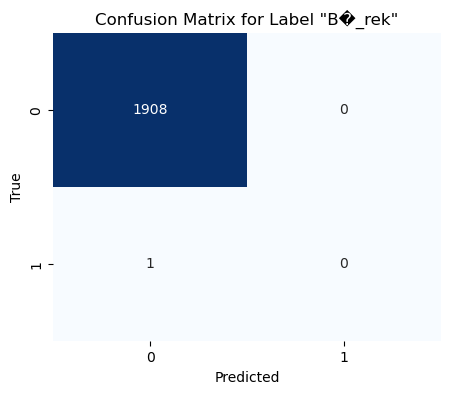

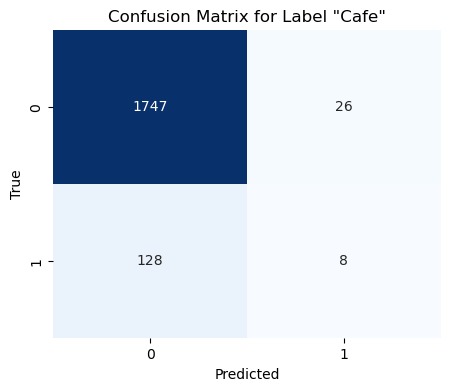

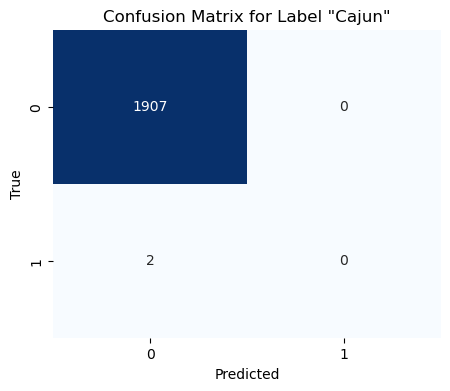

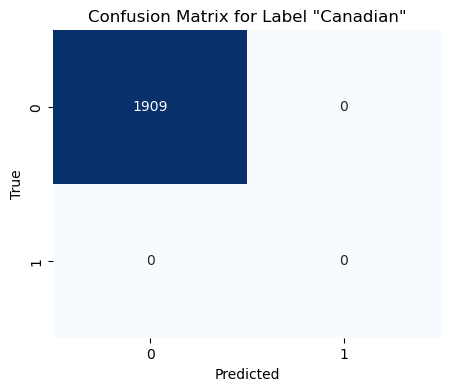

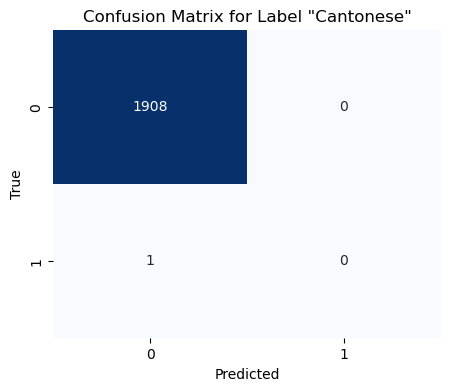

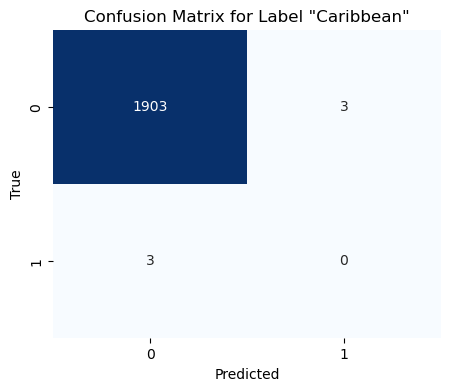

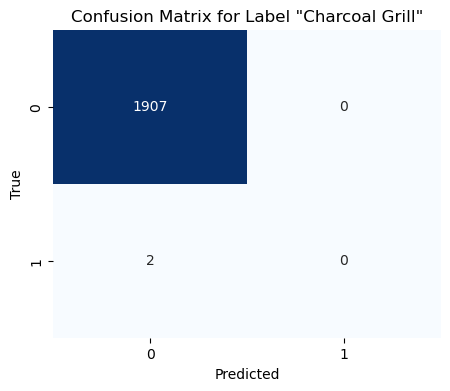

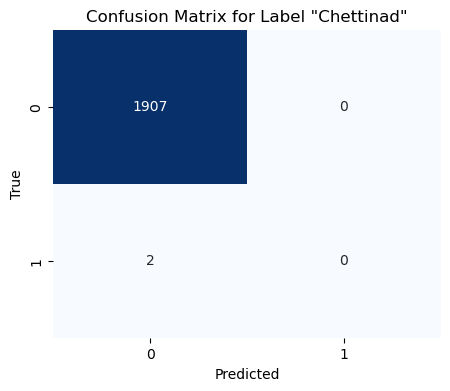

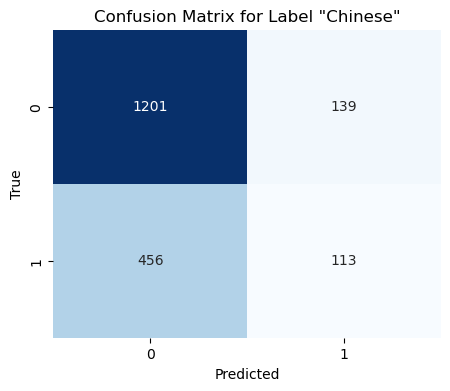

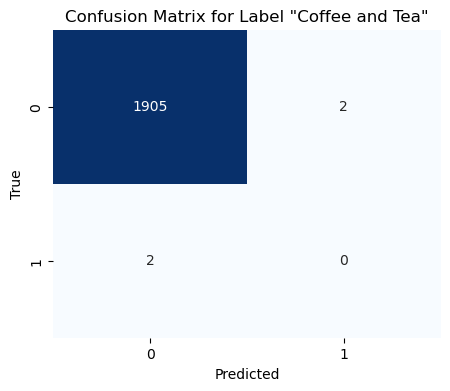

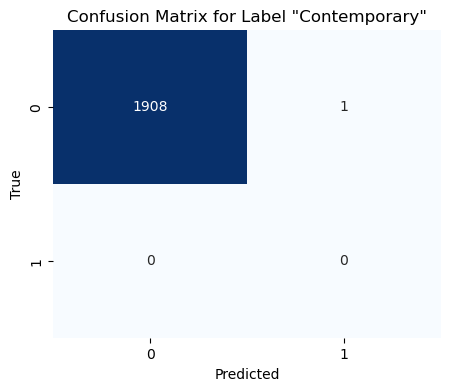

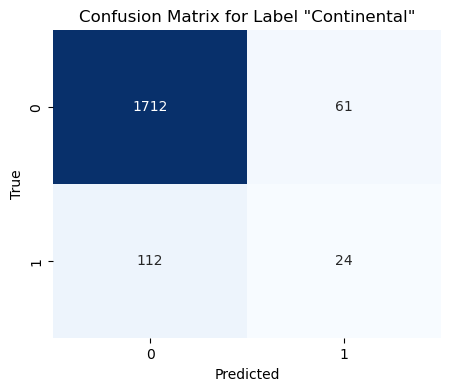

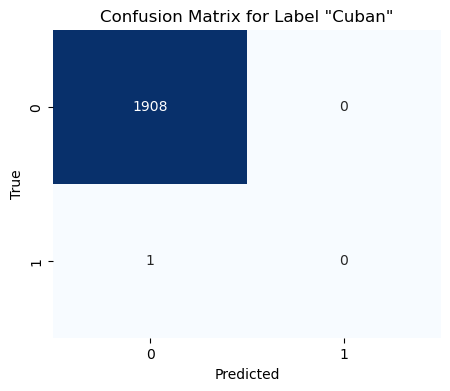

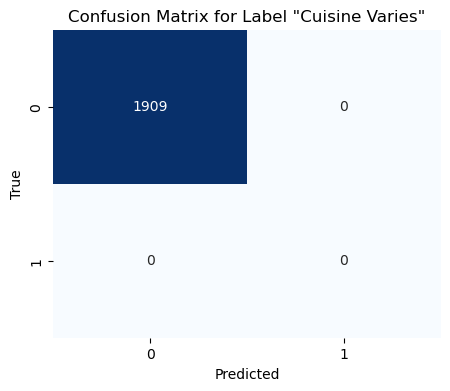

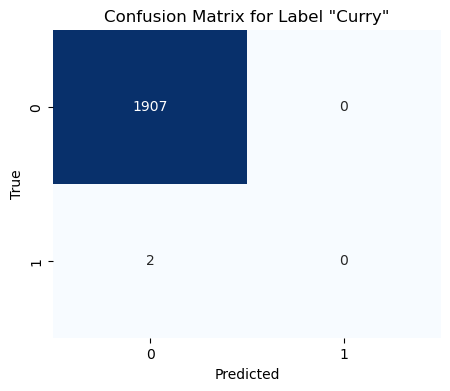

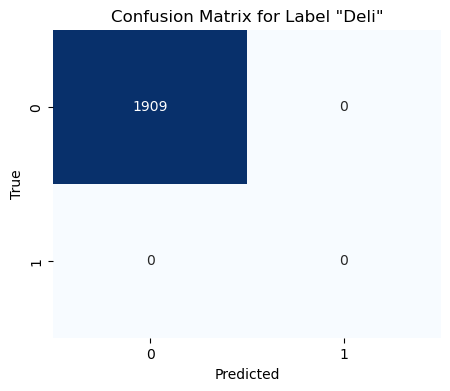

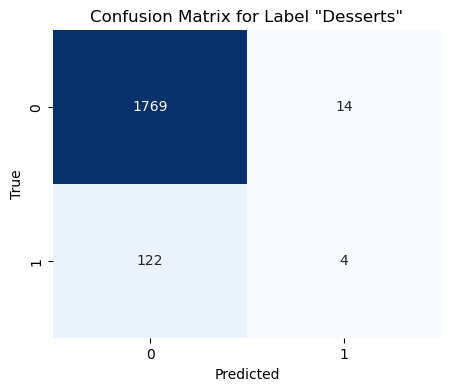

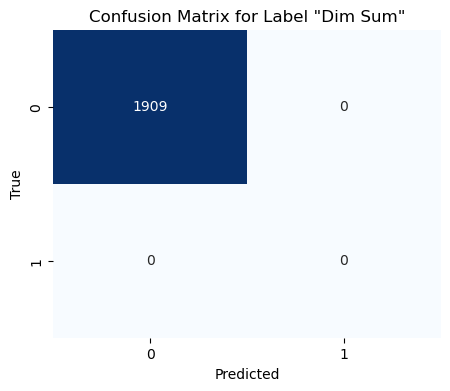

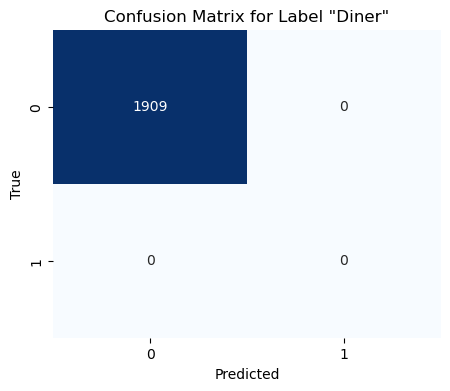

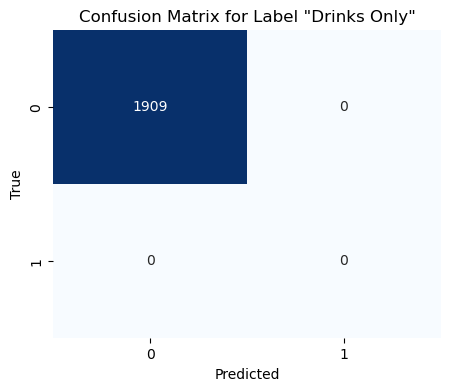

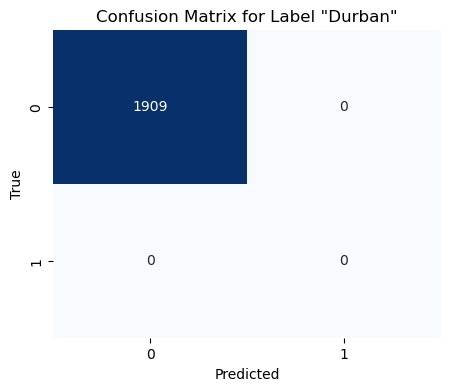

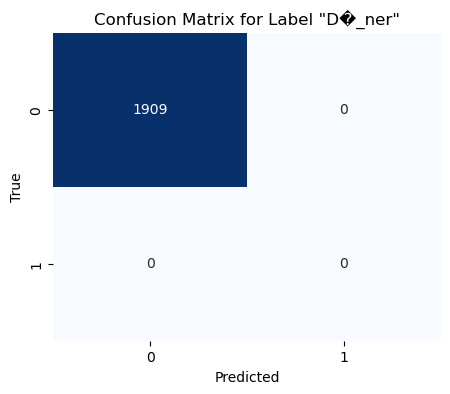

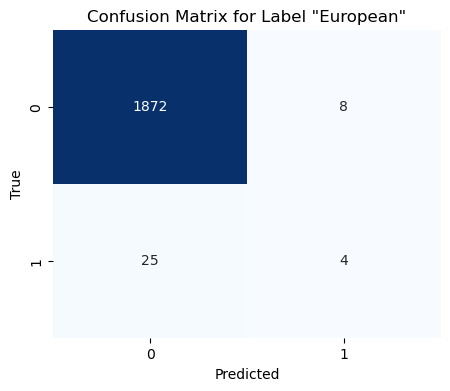

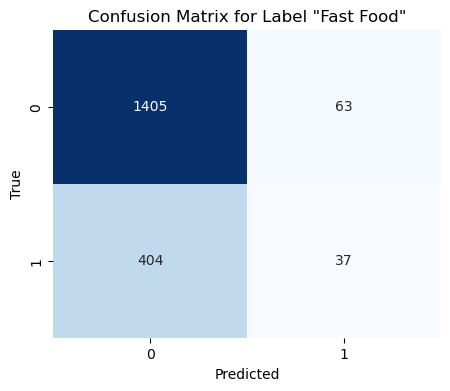

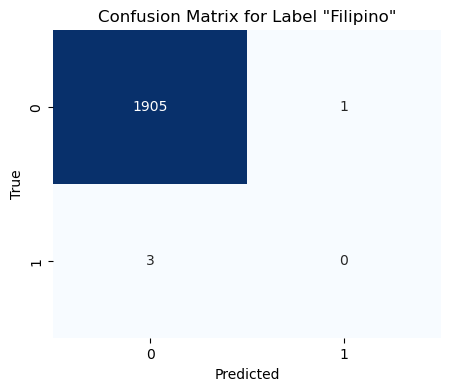

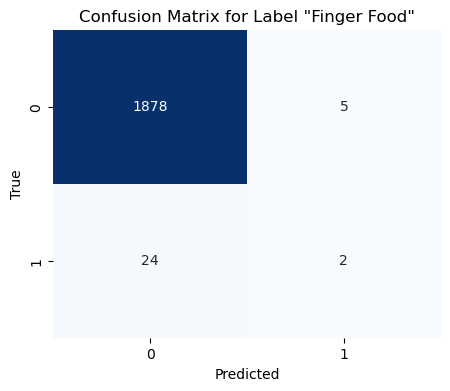

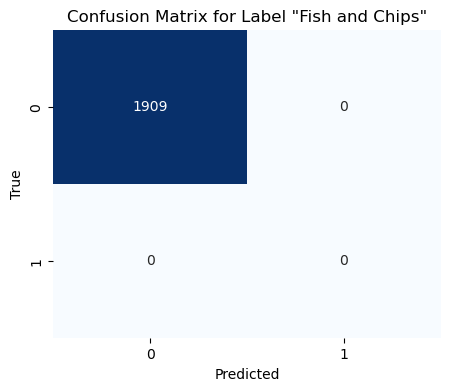

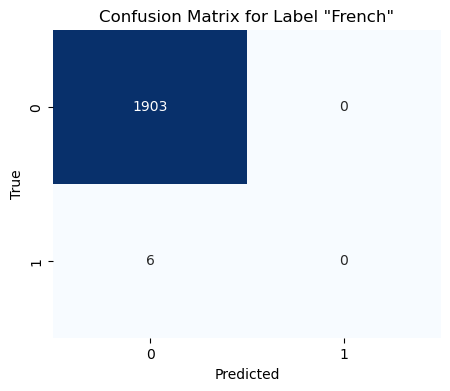

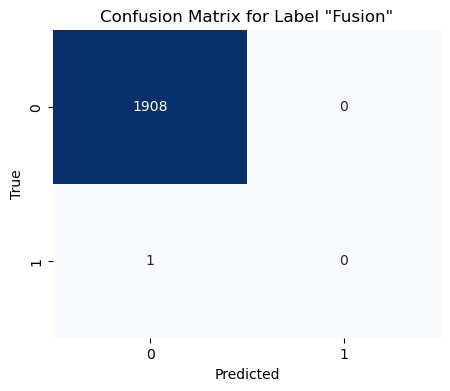

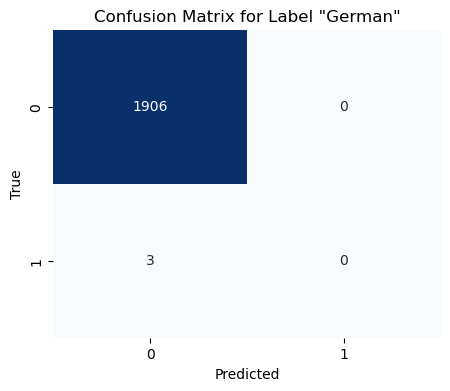

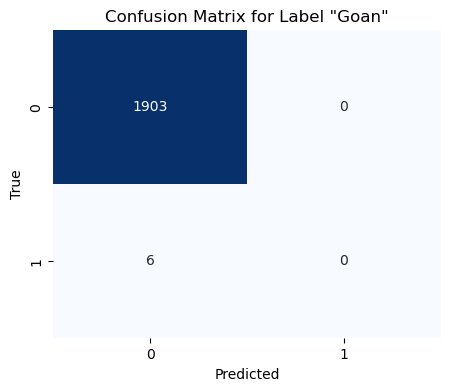

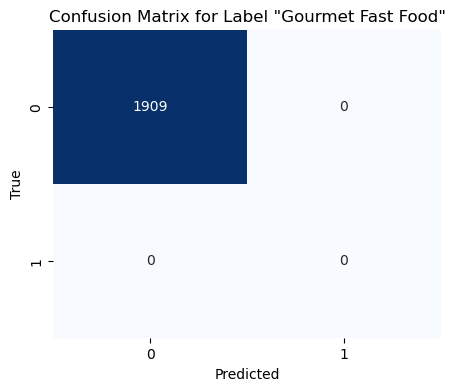

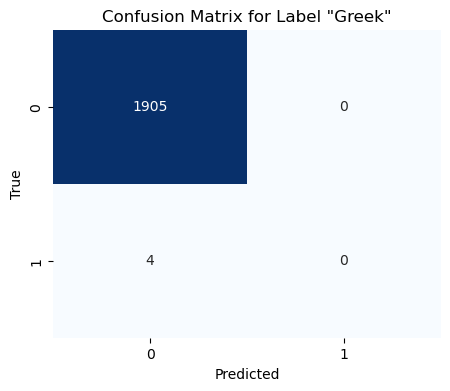

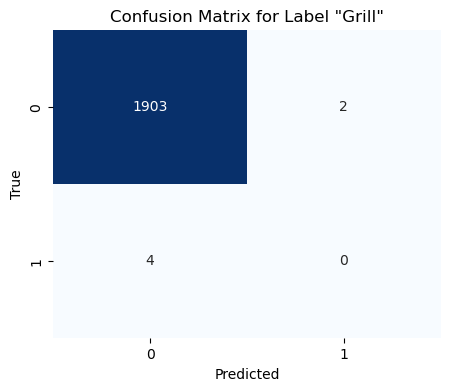

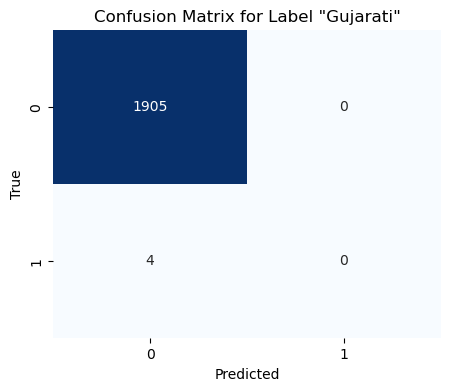

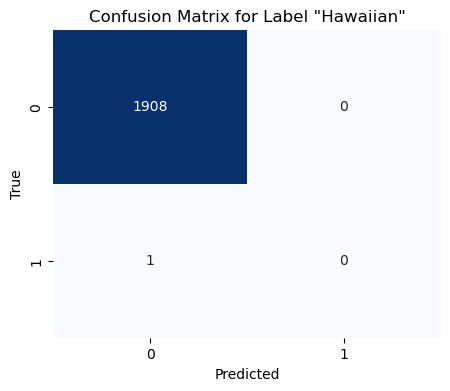

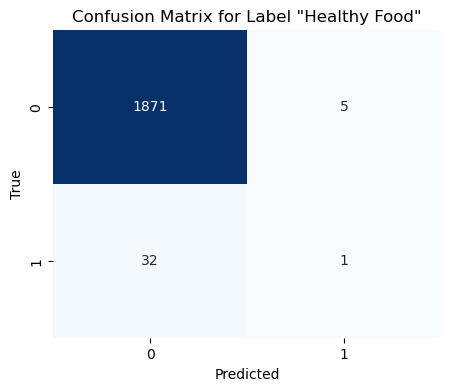

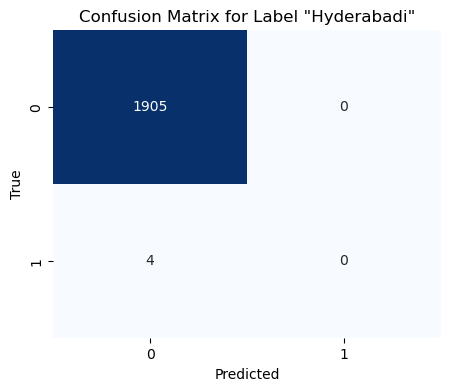

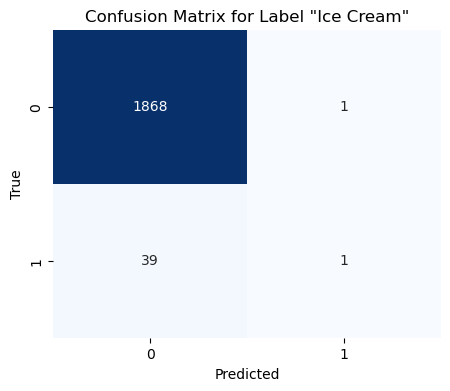

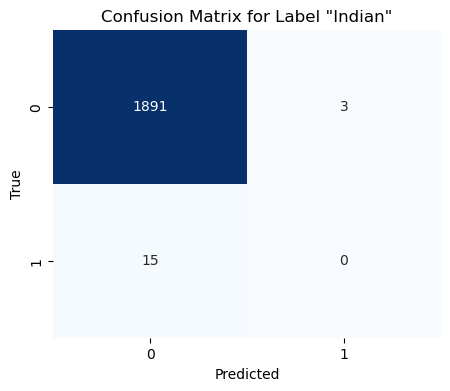

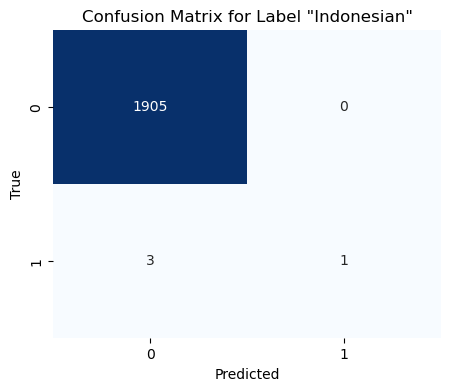

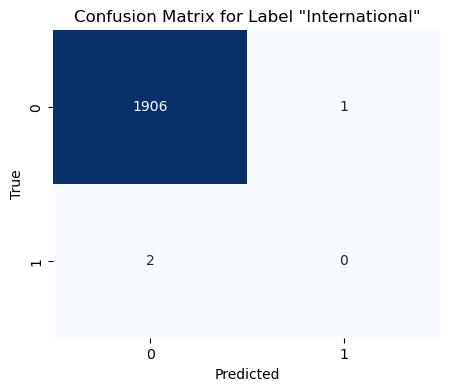

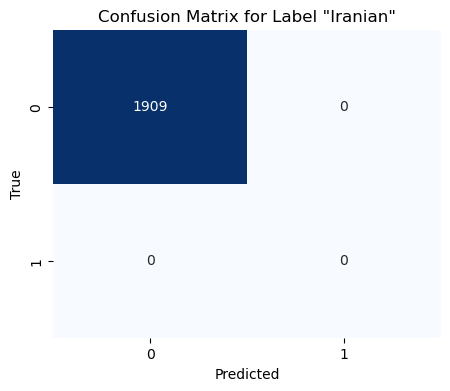

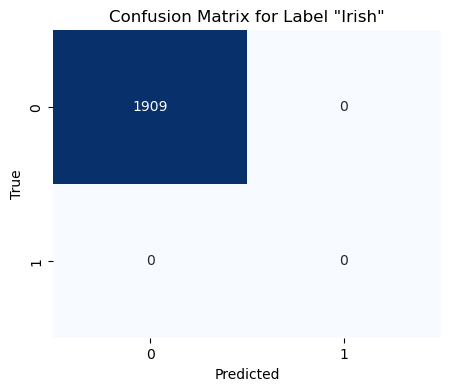

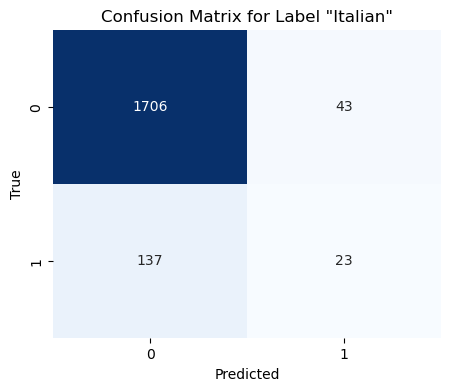

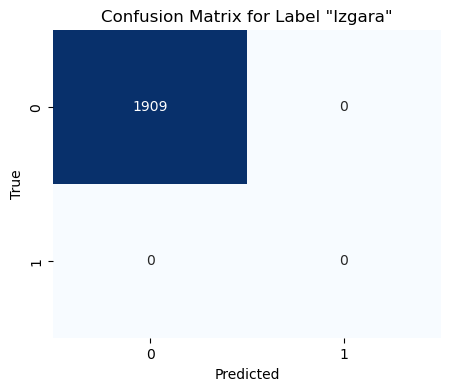

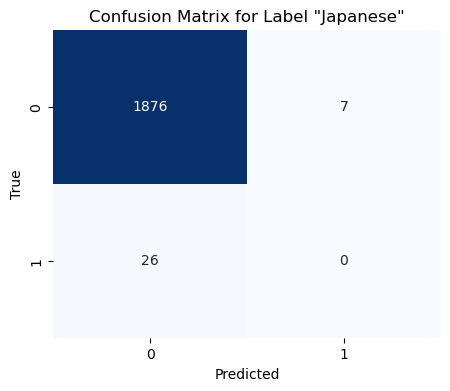

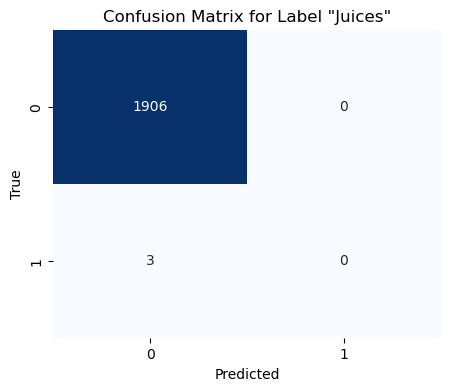

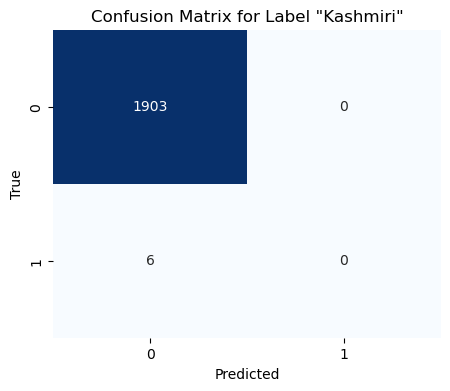

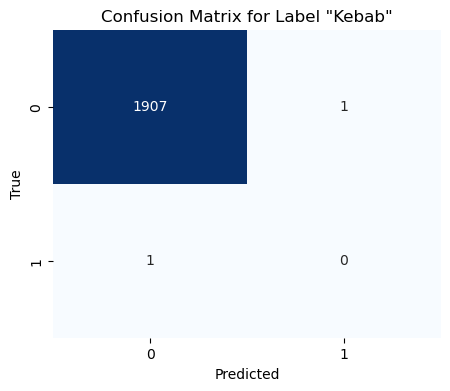

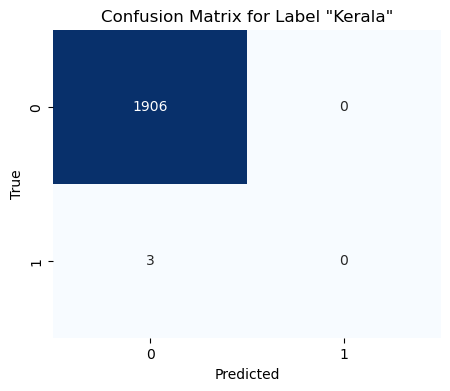

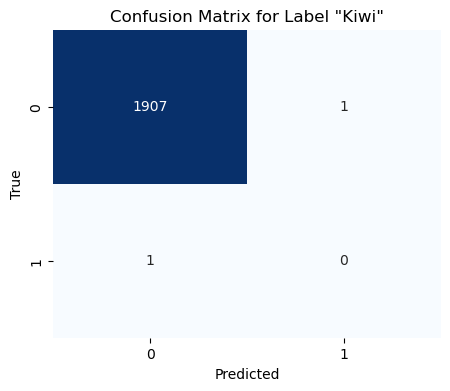

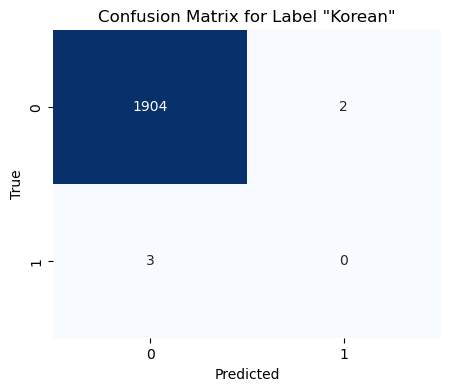

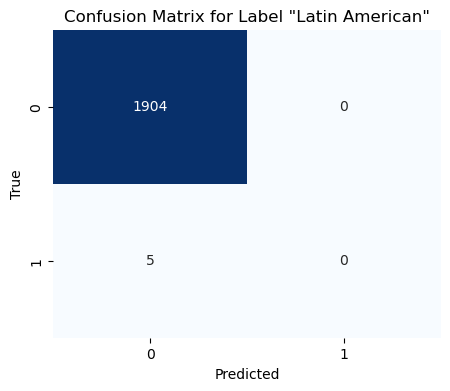

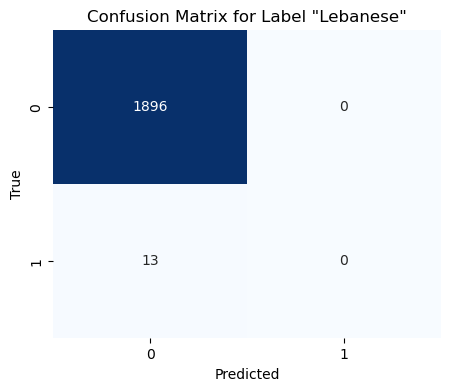

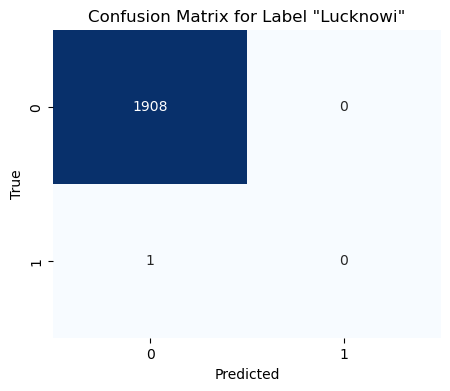

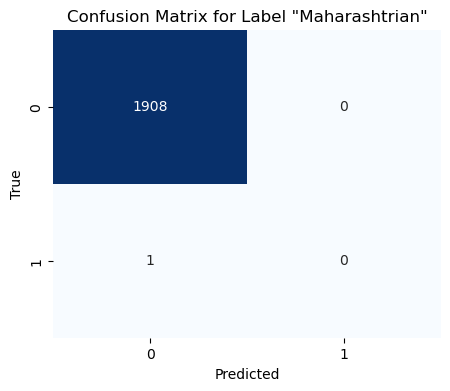

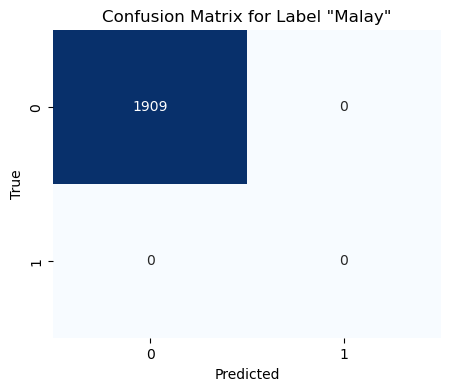

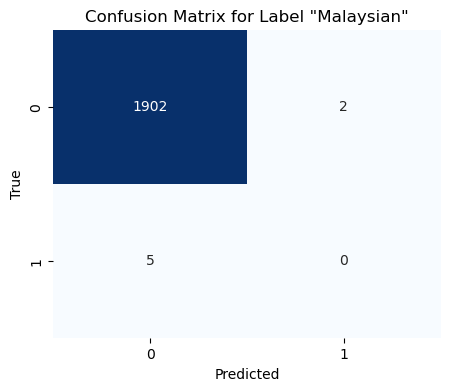

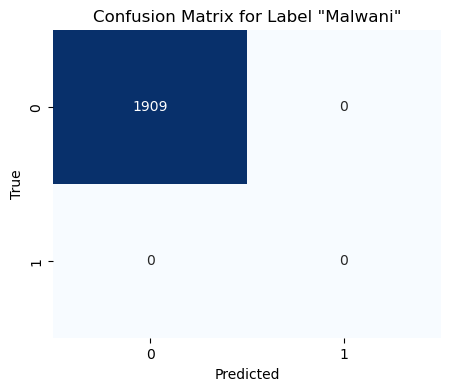

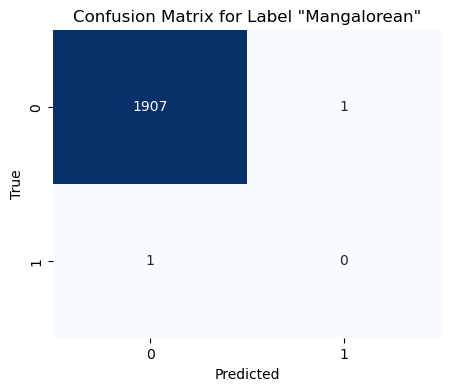

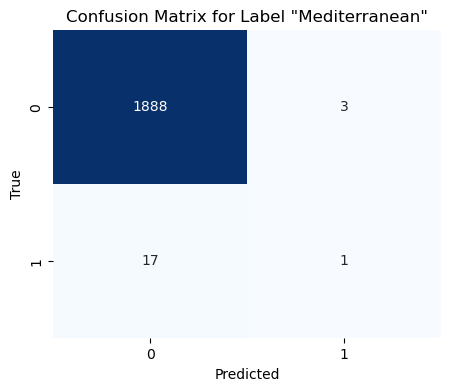

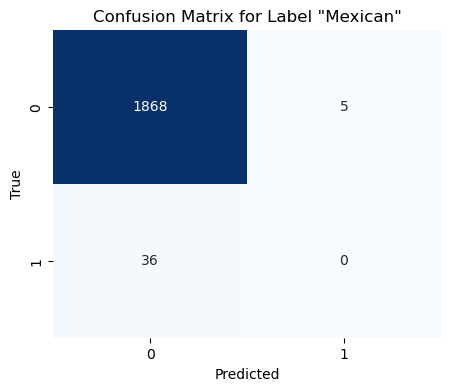

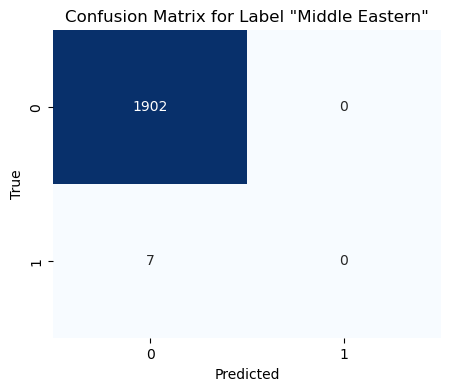

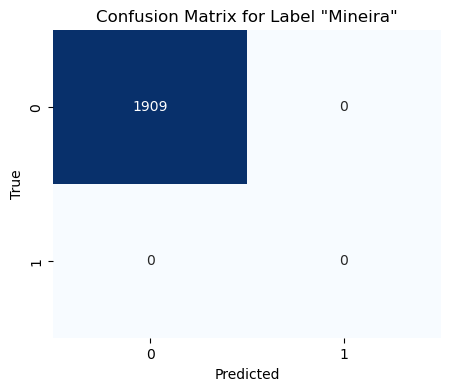

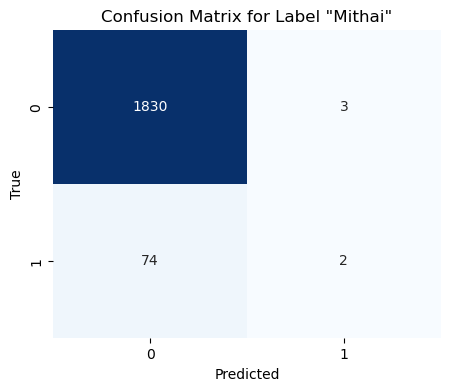

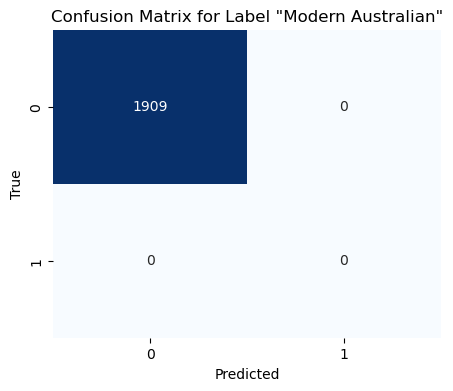

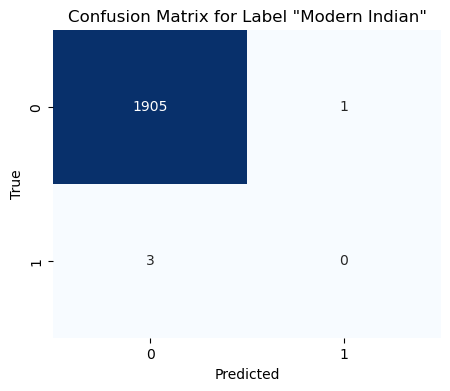

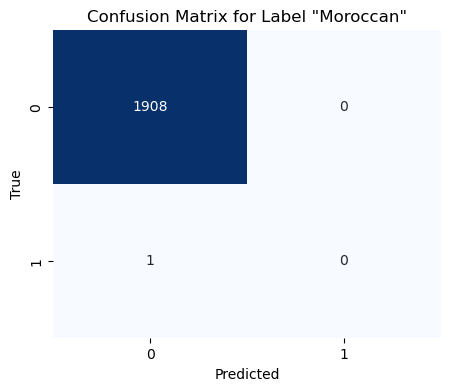

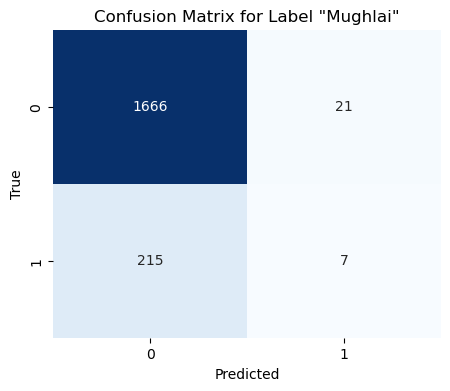

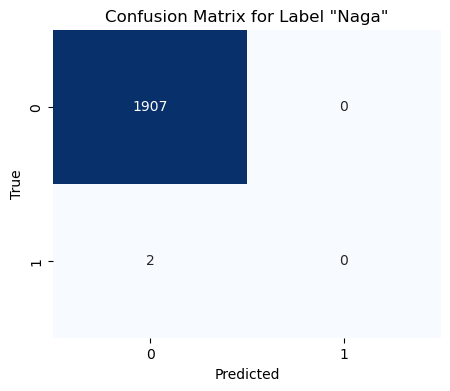

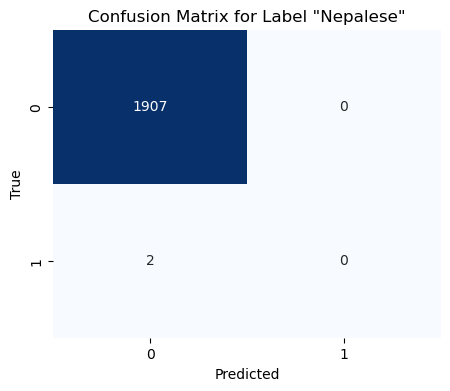

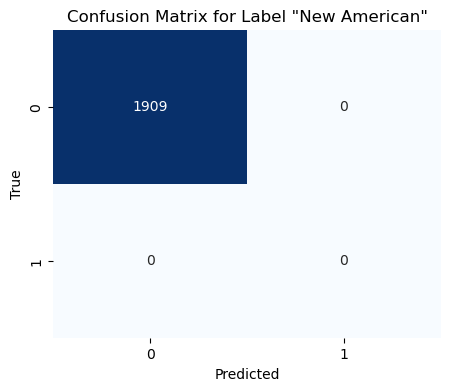

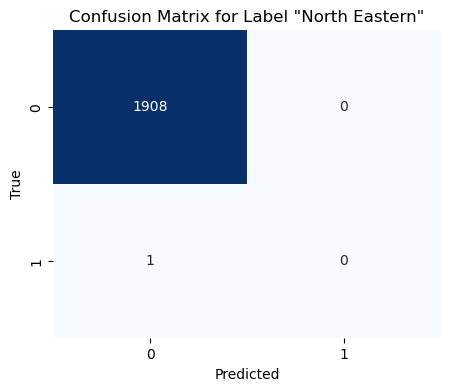

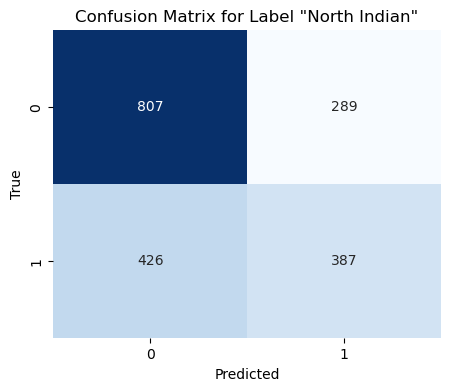

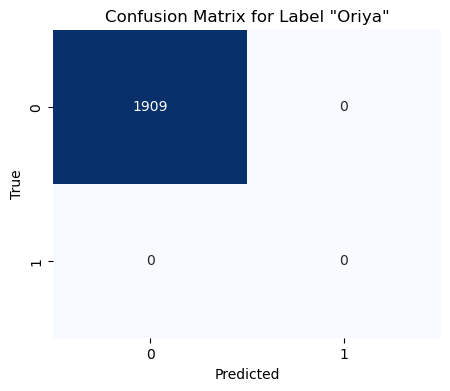

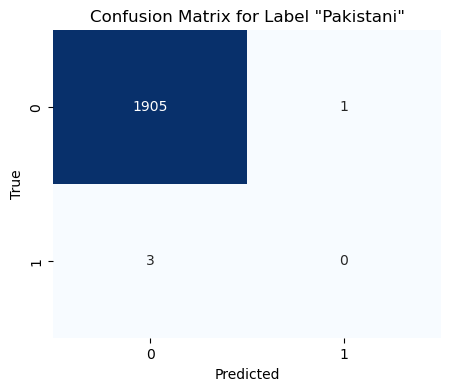

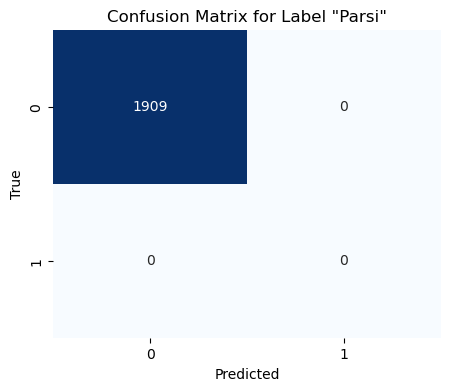

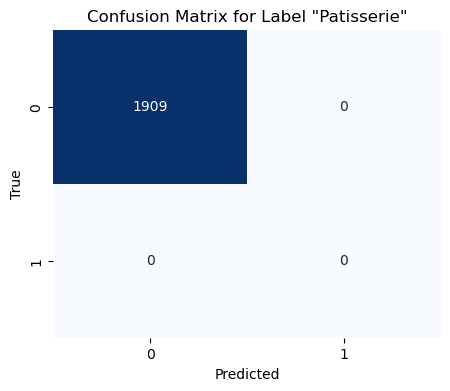

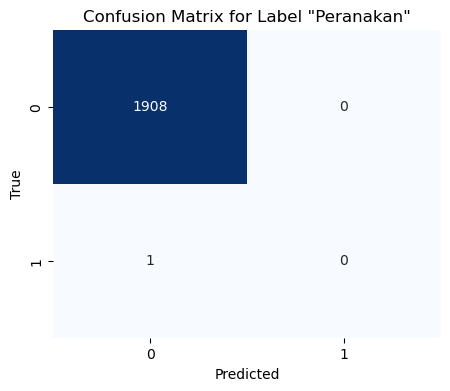

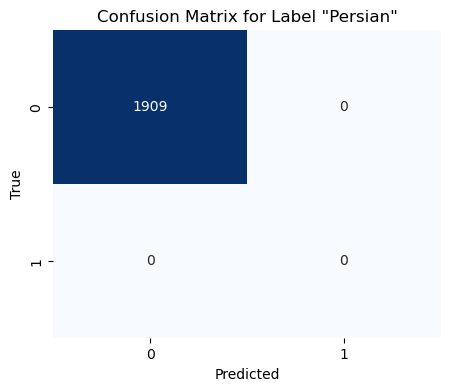

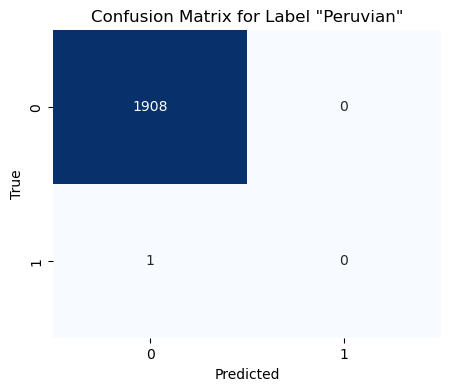

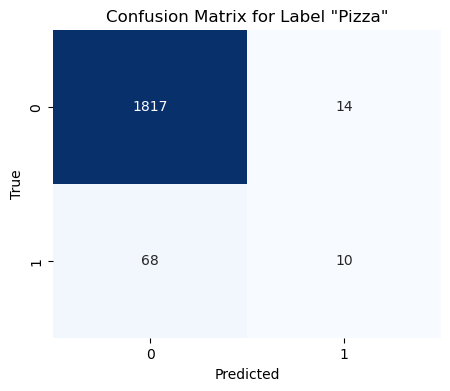

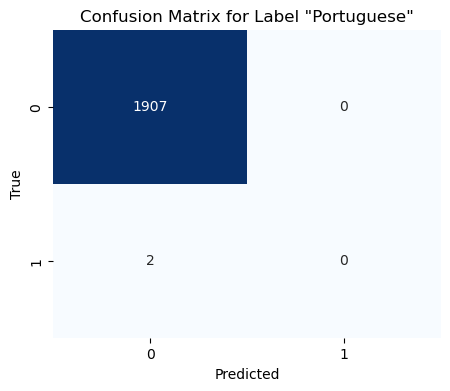

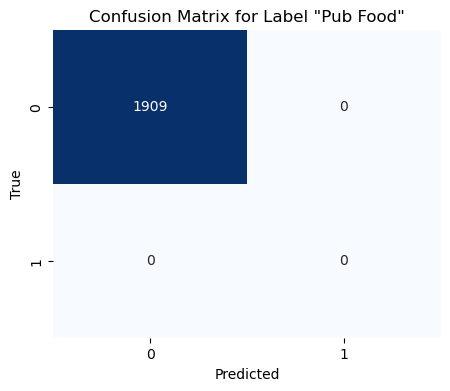

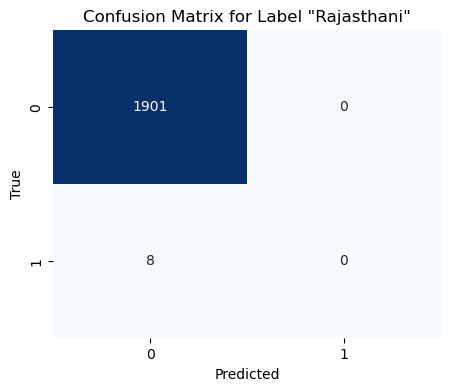

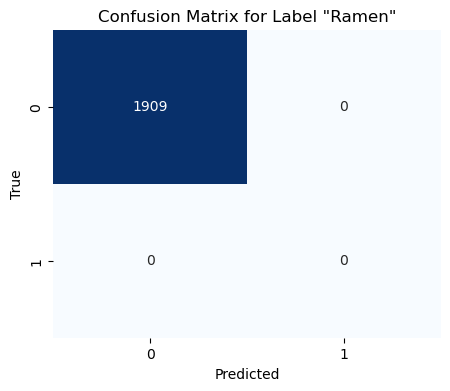

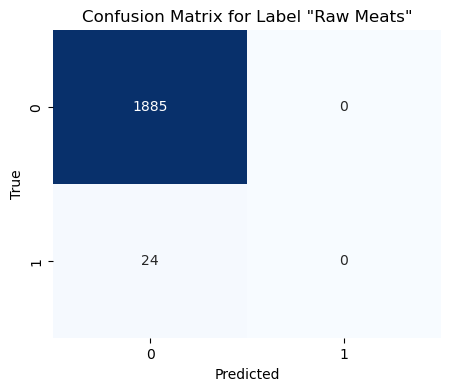

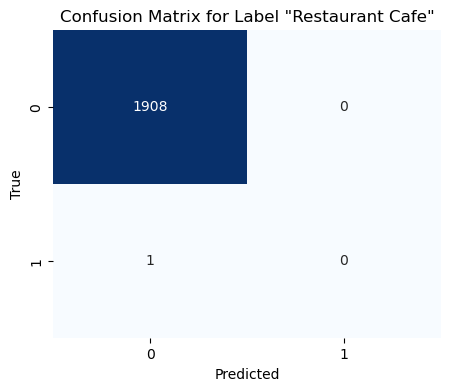

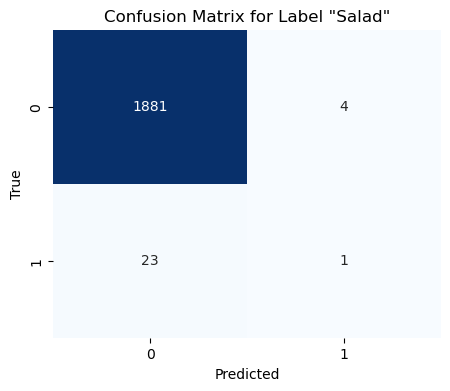

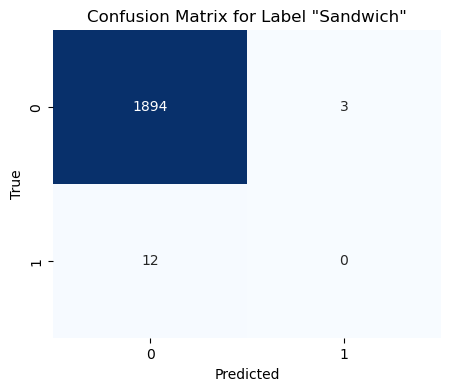

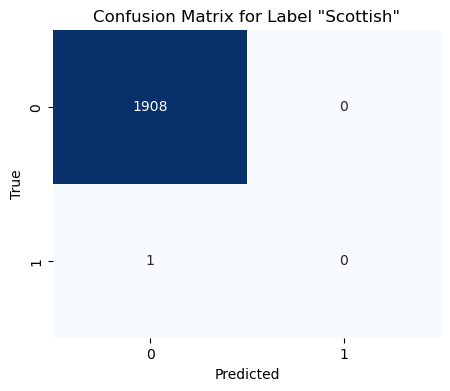

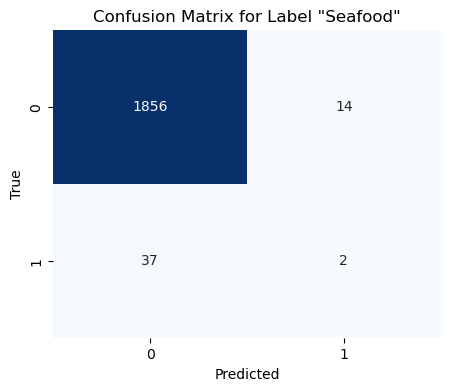

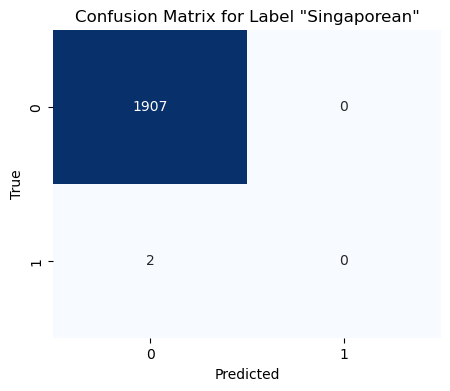

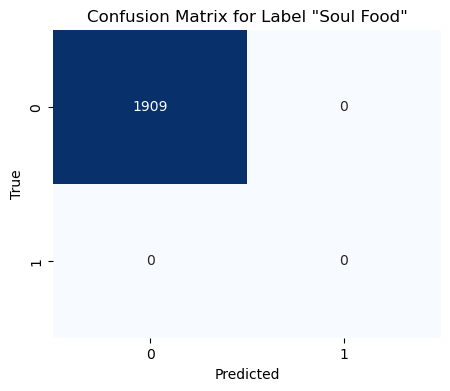

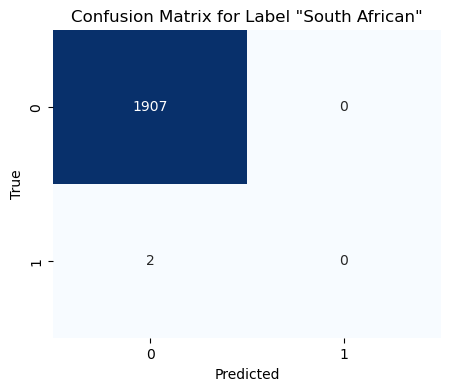

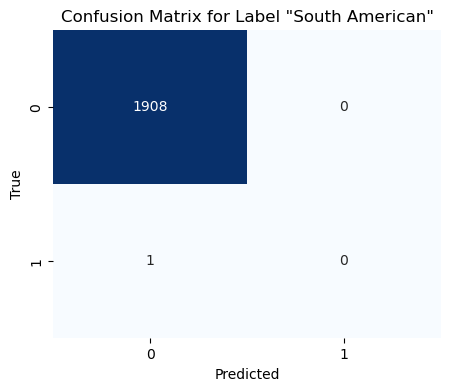

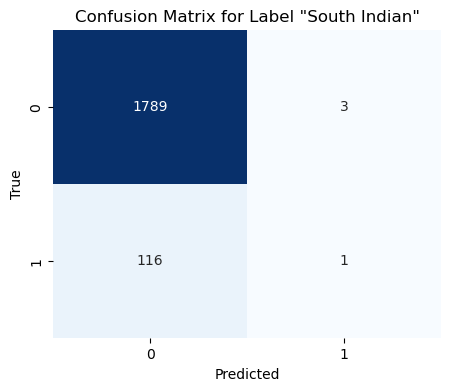

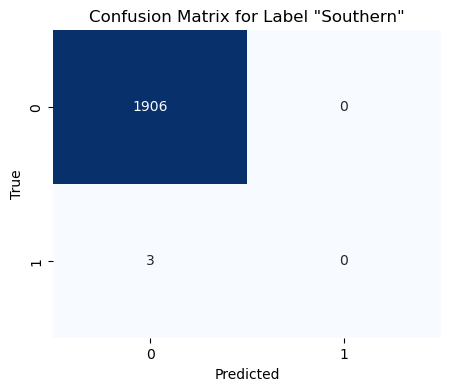

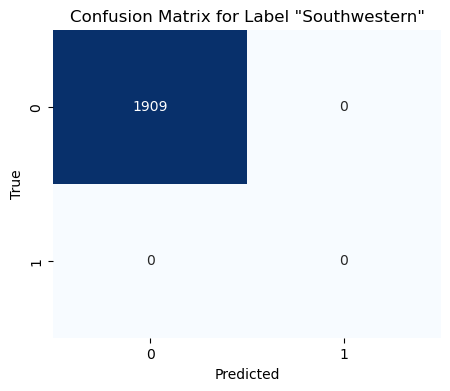

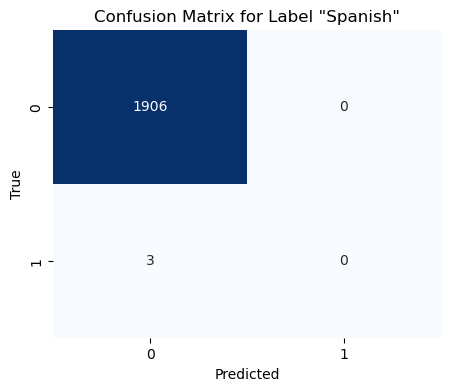

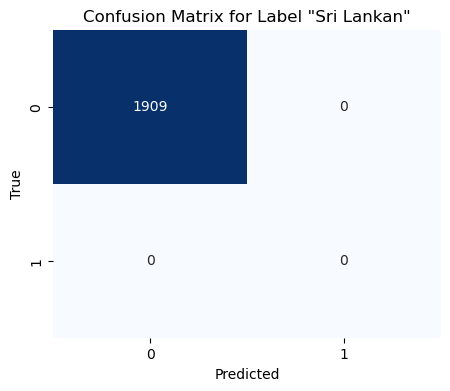

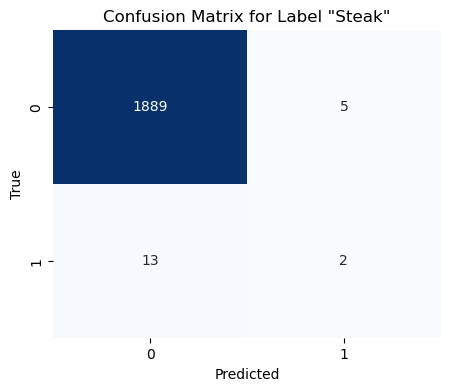

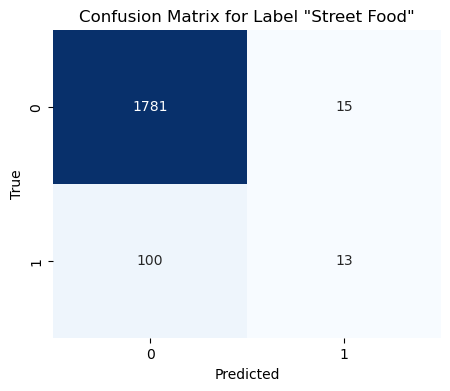

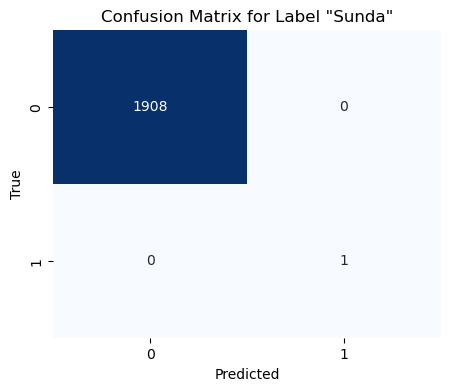

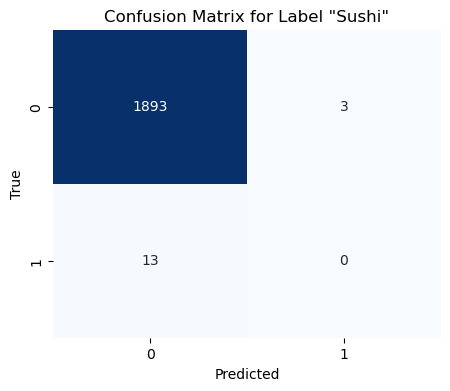

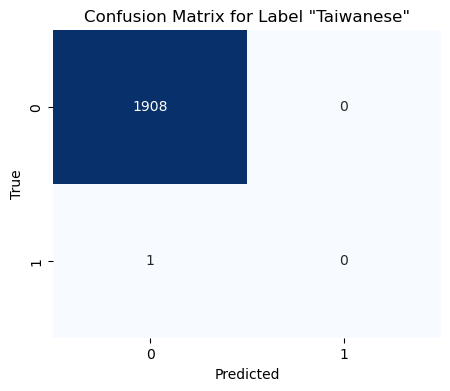

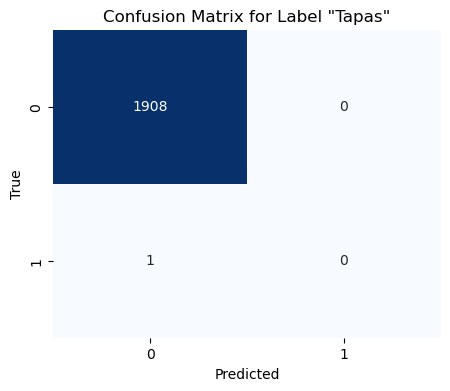

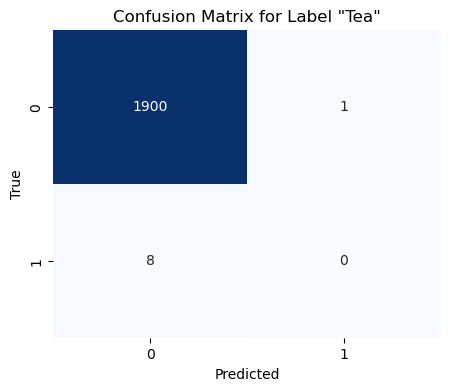

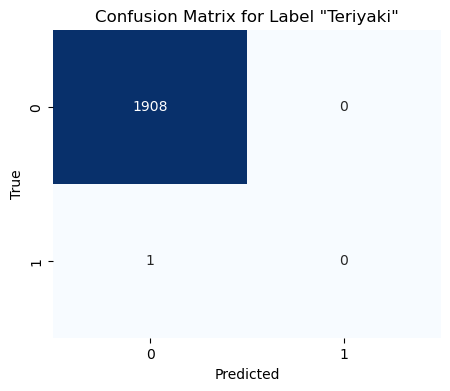

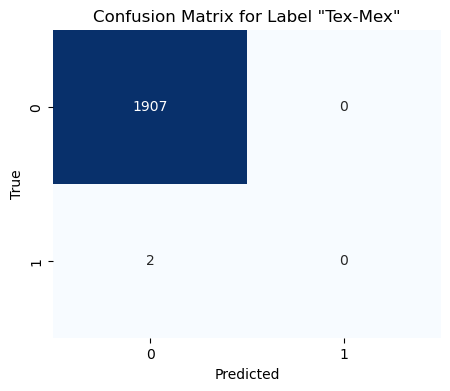

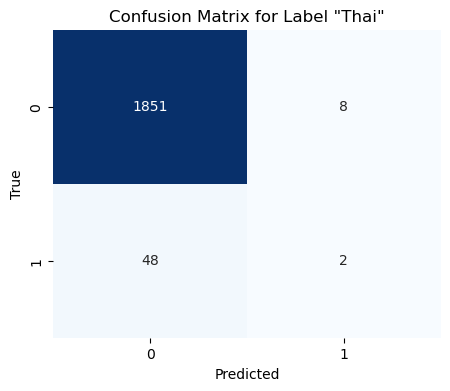

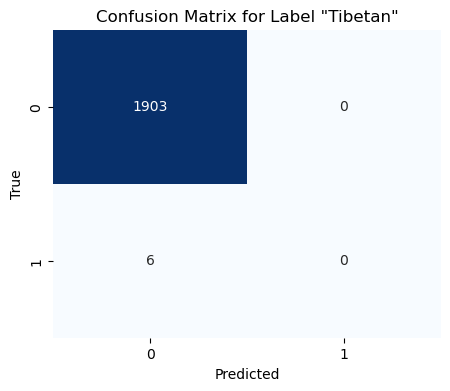

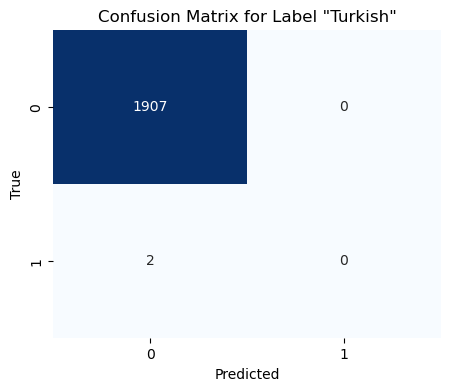

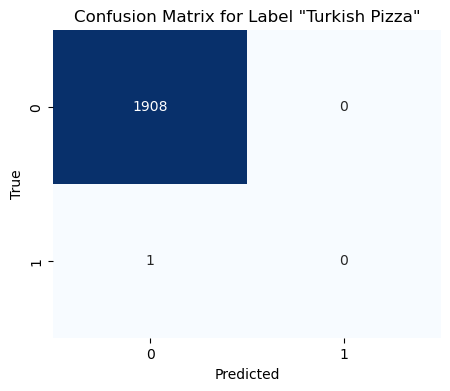

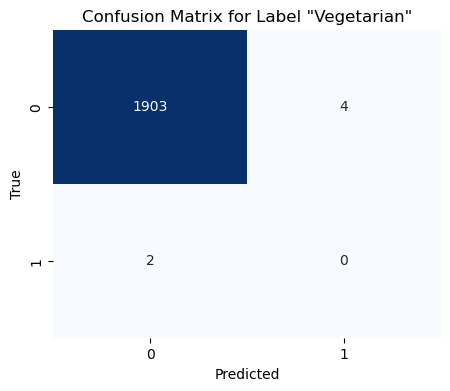

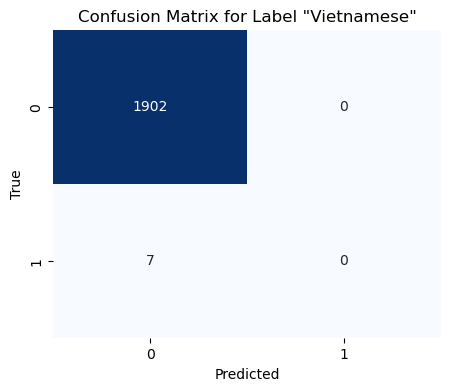

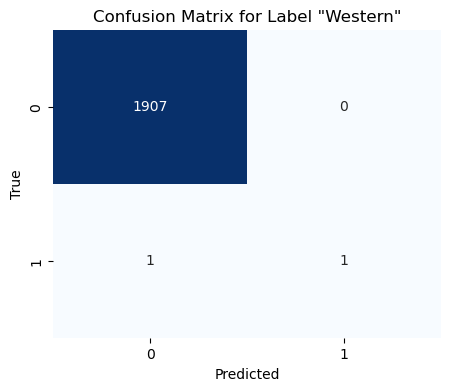

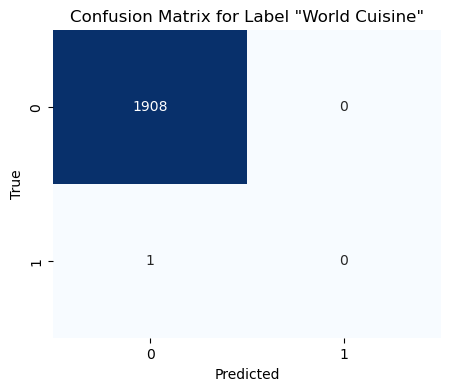

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

for i, matrix in enumerate(conf_matrix):
    label_name = mlb.classes_[i]
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for Label "{label_name}"')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()